In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from keras import applications

In [ ]:
import cv2
from pathlib import Path
dataset_folder = '/content/drive/MyDrive/data/'
classnames = []
for path in Path(dataset_folder).iterdir():
    if path.is_dir():
        classnames.append(str(path).split('/')[-1])
print(classnames)
X_train = []
y_train = []
for i in range(len(classnames)):
  print(classnames[i])
  images = list(Path(dataset_folder+classnames[i]).glob('*'))
  for image in range(int(len(images))):
    img = cv2.imread(str(images[image]))
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32')
    img = img/255
    X_train.append(img)
    y_train.append(i)

['blast', 'bacterial_leaf_blight', 'downy_mildew', 'bacterial_leaf_streak', 'bacterial_panicle_blight', 'dead_heart', 'normal', 'hispa', 'tungro', 'brown_spot']
blast
bacterial_leaf_blight
downy_mildew
bacterial_leaf_streak
bacterial_panicle_blight
dead_heart
normal
hispa
tungro
brown_spot


In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
print(np.array(X_train).shape)

(10407, 128, 128, 3)


In [ ]:
#có thể bỏ
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(X_train), np.array(y_train), test_size=0.01)

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
model.add((Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3), padding='same')))
model.add(MaxPooling2D((2,2), padding='same'))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2),padding='same'))

model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dense(10, activation= 'softmax'))

from keras.optimizers import Adam
import keras
model.compile(optimizer= Adam(), loss = keras.losses.categorical_crossentropy, metrics= ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 128)      0

In [ ]:
history = model.fit(X_train, y_train, batch_size= 128 , epochs= 20 , verbose= 2)

Epoch 1/20
81/81 - 16s - loss: 2.0736 - accuracy: 0.2694 - 16s/epoch - 194ms/step
Epoch 2/20
81/81 - 5s - loss: 1.4952 - accuracy: 0.5004 - 5s/epoch - 67ms/step
Epoch 3/20
81/81 - 5s - loss: 1.0301 - accuracy: 0.6733 - 5s/epoch - 68ms/step
Epoch 4/20
81/81 - 5s - loss: 0.6815 - accuracy: 0.7836 - 5s/epoch - 68ms/step
Epoch 5/20
81/81 - 6s - loss: 0.4184 - accuracy: 0.8687 - 6s/epoch - 69ms/step
Epoch 6/20
81/81 - 6s - loss: 0.2534 - accuracy: 0.9241 - 6s/epoch - 69ms/step
Epoch 7/20
81/81 - 6s - loss: 0.1362 - accuracy: 0.9583 - 6s/epoch - 69ms/step
Epoch 8/20
81/81 - 6s - loss: 0.0707 - accuracy: 0.9800 - 6s/epoch - 69ms/step
Epoch 9/20
81/81 - 6s - loss: 0.0548 - accuracy: 0.9862 - 6s/epoch - 69ms/step
Epoch 10/20
81/81 - 6s - loss: 0.0475 - accuracy: 0.9872 - 6s/epoch - 68ms/step
Epoch 11/20
81/81 - 6s - loss: 0.0288 - accuracy: 0.9944 - 6s/epoch - 68ms/step
Epoch 12/20
81/81 - 6s - loss: 0.0341 - accuracy: 0.9922 - 6s/epoch - 73ms/step
Epoch 13/20
81/81 - 6s - loss: 0.0255 - accura

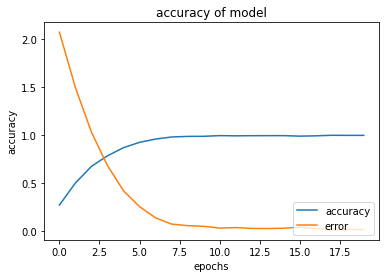

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('accuracy of model')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['accuracy','error'], loc = 'lower right')

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 42ms/step - loss: 0.6703 - accuracy: 0.8571


(128, 128, 3)
1/1 [==============================] - 0s 81ms/step
Predict: brown_spot
Class: brown_spot


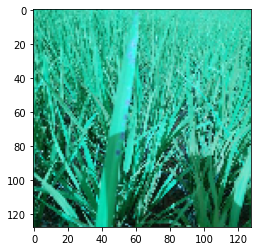

In [ ]:
n = 56
print(X_test[n].shape)
plt.imshow(X_test[n])
pred = model.predict(X_test[n].reshape((1, 128, 128, 3)))
print("Predict: " + classnames[pred.argmax()])
print("Class: " + classnames[y_test[n].argmax()])

In [ ]:
model.save('my_modelAI.h5')

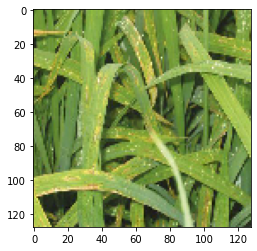

In [ ]:
from keras.utils.image_utils import load_img
image = load_img('/content/th (1).jfif', target_size=(128,128)) #,grayscale=True
plt.imshow(image)

In [ ]:
from keras.utils.image_utils import img_to_array
x = image
img = img_to_array(x)
img = img.reshape(1,128,128,3)
img = img.astype('float32')
img = img/255
tag = np.argmax(model.predict(img),axis=1)
print(classnames[tag[0]])

1/1 [==============================] - 0s 15ms/step
bacterial_panicle_blight
